In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-58.66626475498262 -67.401038486889
-42.380239924117134 -36.74071061276163
-18.78779243865118 -17.90653870867962
78.77627973976121 16.393628276125725
-73.05423969109688 -177.17710688057417
30.988541802267022 -100.24797303874388
-28.96795738331047 -100.69487269414515
31.294653293450338 -64.35079619293073
-73.40998889887449 -35.09912403326075
89.24560791524073 -160.483923618954
29.304630236769526 9.195961161288125
41.941212922664334 8.740343097762633
-28.026216149526192 -13.701349252658815
83.61031804636835 31.045234824989308
68.87379107741228 -105.1143501127917
-59.63282129651501 176.89982830139246
-9.669199923445575 -41.23106893223189
33.184662393848456 63.5414704505142
-0.7164984125189306 35.024884748932976
-2.667601310447054 -87.2625292957066
60.60586089774577 -66.65854591781483
-88.51330110151255 164.2011100329529
-8.229311689639715 -110.67558728082705
-49.8638974477739 -55.57702520697026
-51.04066924486931 -18.78687989039247
-18.400961234508273 -108.00427243423306
71.91284677260731

54.26556219418242 141.98758579869798
-72.74698402359041 153.42834183144004
70.86192045116718 13.766009246437704
-65.45665675988201 -119.1850993687692
-61.62070277628699 -174.84303048563945
86.10845803619415 121.13873213636538
-70.37563828382756 17.892192498124388
34.60072634003579 -119.14201422808713
-35.57582504201639 45.224264502920306
-43.34065440908967 90.29640227416098
-74.70938806004017 160.23239885254145
80.5473943933128 110.61405632780094
-38.0666647892865 -124.30104044325995
55.36285170786914 38.694162419478175
-50.41954685561786 129.33191127208852
43.93684087549306 178.7023915018642
4.935574037156385 36.92749886350197
-34.12171466638892 176.33438024585627
-21.034542674004726 -64.00784628071573
-39.90164112949634 -57.46619935200975
-23.59322575664706 43.73678874523637
-56.82954250528069 58.352794289089076
-59.96232735274793 -29.743899566772882
-88.55681074507469 106.6440210040468
3.2009591901129966 62.18446577428767
64.84541701666942 -117.143708105603
-88.85723103223958 26.269

-11.291435835448766 92.10621744205537
28.777166517865894 1.2290088602312892
72.9760028496014 -86.64981097147624
67.24051450522242 -39.816971283829986
-79.77489314613385 63.95618091058344
51.35987598835297 49.418093067875134
-14.743178009333619 -99.41749393807538
86.13174202261791 153.88106554245968
61.16057052568448 12.554821195723292
40.81345609461911 69.65106704049859
-49.55610458823456 -83.92248490573715
3.0913396754120583 -45.479580394236564
89.8977457680671 141.06605208345326
-50.837950392046594 118.98412236490651
-81.85812859537762 41.076440581638764
53.68061812078966 -16.248825591226392
-74.64467008739435 -24.005834981145654
46.59763991893567 -155.4211861530093
-83.67664944179035 29.283188999434742
46.1822304263076 -125.55481591983157
-39.504649608187584 -124.72093010990113
35.793524342788345 -130.4855732193129
-44.13671821573698 154.0266730306808
27.429903306764885 -23.361024652892098
-45.14578012857099 149.94499102739638
68.18569024249922 -149.22089395987504
-29.94757149218030

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [7]:
# Import the requests library.
import requests

# Import the API key
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10645d15a28a766dd86e36537e3427cb


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | san angelo
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | nalut
Processing Record 11 of Set 1 | ajaccio
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | berlevag
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | sento se
City not found. Skipping...
Processing Record 17 of Set 1 | taywarah
Processing Record 18 of Set 1 | sotik
Processing Record 19 of Set 1 | san cristobal
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | puerto ayora
Processing Record

City not found. Skipping...
Processing Record 39 of Set 4 | gladstone
Processing Record 40 of Set 4 | port blair
Processing Record 41 of Set 4 | seoul
Processing Record 42 of Set 4 | zvenigovo
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | namibe
Processing Record 45 of Set 4 | fort nelson
Processing Record 46 of Set 4 | dujuma
City not found. Skipping...
Processing Record 47 of Set 4 | faanui
Processing Record 48 of Set 4 | jamsa
Processing Record 49 of Set 4 | cockburn town
Processing Record 50 of Set 4 | bangolo
Processing Record 1 of Set 5 | haines junction
Processing Record 2 of Set 5 | alakurtti
Processing Record 3 of Set 5 | lakselv
Processing Record 4 of Set 5 | mahebourg
Processing Record 5 of Set 5 | sobolevo
Processing Record 6 of Set 5 | tahta
Processing Record 7 of Set 5 | lubao
Processing Record 8 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 9 of Set 5 | kazalinsk
City not found. Skipping...
Processing Record 10 of Se

Processing Record 25 of Set 8 | sinnamary
Processing Record 26 of Set 8 | iaciara
Processing Record 27 of Set 8 | bereda
Processing Record 28 of Set 8 | grand centre
City not found. Skipping...
Processing Record 29 of Set 8 | ilulissat
Processing Record 30 of Set 8 | mchinji
Processing Record 31 of Set 8 | sambava
Processing Record 32 of Set 8 | bondo
Processing Record 33 of Set 8 | hobyo
Processing Record 34 of Set 8 | port alfred
Processing Record 35 of Set 8 | vuktyl
Processing Record 36 of Set 8 | lavrentiya
Processing Record 37 of Set 8 | paita
Processing Record 38 of Set 8 | kahului
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | dalvik
Processing Record 41 of Set 8 | muzhi
Processing Record 42 of Set 8 | mahibadhoo
Processing Record 43 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 44 of Set 8 | rzhyshchiv
Processing Record 45 of Set 8 | qujing
Processing Record 46 of Set 8 | hervey bay
Processing Record 47 of Set 8 | husavik
Proce

Processing Record 14 of Set 12 | hopelchen
Processing Record 15 of Set 12 | krasnoselkup
Processing Record 16 of Set 12 | vurpar
Processing Record 17 of Set 12 | sumbal
Processing Record 18 of Set 12 | mount gambier
Processing Record 19 of Set 12 | sorvag
City not found. Skipping...
Processing Record 20 of Set 12 | dunedin
Processing Record 21 of Set 12 | red wing
Processing Record 22 of Set 12 | shush
Processing Record 23 of Set 12 | biak
Processing Record 24 of Set 12 | zhezkazgan
Processing Record 25 of Set 12 | kaseda
Processing Record 26 of Set 12 | kavaratti
Processing Record 27 of Set 12 | kampong thum
Processing Record 28 of Set 12 | buraydah
Processing Record 29 of Set 12 | turka
Processing Record 30 of Set 12 | maniwaki
Processing Record 31 of Set 12 | houston
Processing Record 32 of Set 12 | campina grande do sul
Processing Record 33 of Set 12 | garden city
Processing Record 34 of Set 12 | khargone
Processing Record 35 of Set 12 | stoyba
City not found. Skipping...
Processin

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,42.46,56,40,9.22,AR,2022-06-27 23:41:19
1,Cidreira,-30.1811,-50.2056,60.76,89,100,9.33,BR,2022-06-27 23:41:20
2,Georgetown,5.4112,100.3354,80.53,86,20,4.61,MY,2022-06-27 23:28:42
3,Longyearbyen,78.2186,15.6401,44.44,76,40,12.66,SJ,2022-06-27 23:31:32
4,Vaini,-21.2000,-175.2000,78.96,73,40,9.22,TO,2022-06-27 23:41:20
5,San Angelo,31.4638,-100.4370,95.22,30,20,16.11,US,2022-06-27 23:41:21
6,Lebu,-37.6167,-73.6500,52.83,93,96,9.73,CL,2022-06-27 23:31:27
7,Hamilton,39.1834,-84.5333,80.04,43,0,12.66,US,2022-06-27 23:33:37
8,Barrow,71.2906,-156.7887,59.02,63,100,13.80,US,2022-06-27 23:37:15
9,Nalut,30.3333,10.8500,92.03,14,6,19.22,LY,2022-06-27 23:31:32


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-06-27 23:41:19,-54.8000,-68.3000,42.46,56,40,9.22
1,Cidreira,BR,2022-06-27 23:41:20,-30.1811,-50.2056,60.76,89,100,9.33
2,Georgetown,MY,2022-06-27 23:28:42,5.4112,100.3354,80.53,86,20,4.61
3,Longyearbyen,SJ,2022-06-27 23:31:32,78.2186,15.6401,44.44,76,40,12.66
4,Vaini,TO,2022-06-27 23:41:20,-21.2000,-175.2000,78.96,73,40,9.22
...,...,...,...,...,...,...,...,...,...
567,Ilhabela,BR,2022-06-27 23:45:46,-23.7781,-45.3581,65.62,81,63,9.53
568,Kasangulu,CD,2022-06-27 23:45:46,-4.5911,15.1708,72.54,47,43,5.17
569,Pangkalanbuun,ID,2022-06-27 23:45:46,-2.6833,111.6167,76.03,94,72,1.70
570,Nizhniy Odes,RU,2022-06-27 23:45:47,63.6445,54.8560,37.60,81,100,11.95


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

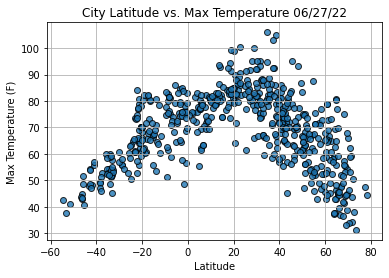

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

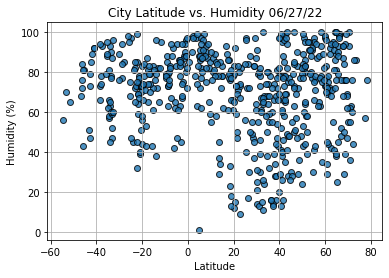

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

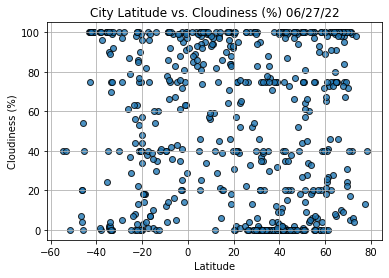

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

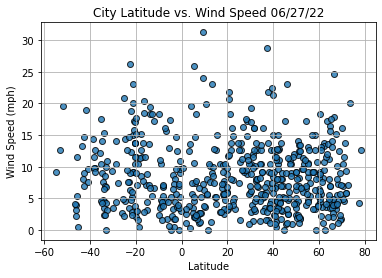

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()